## Data

In [4]:
import tensorflow as tf
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [83]:
def get_dataset_from_non_header(f_path):
    df = pd.read_csv(f_path, header=None)
    Dataset = np.asarray(df.iloc[0, :], dtype='float64')
    
    mean = Dataset[:211].mean()
    Dataset -= mean
    std = Dataset[:211].std()
    Dataset /= std
    
    TR = []
    TARGET = []
    ESTIMATION_TARGET = []
    for i in range(len(Dataset)-99):
        TR.append(Dataset[i:i+50])
        TARGET.append(Dataset[i+50])
        if i==len(Dataset)-99-1:
            ESTIMATION_TARGET.append(Dataset[i+50:])
            
    return np.asarray(TR).reshape(-1,50,1) , np.asarray(TARGET), np.asarray(ESTIMATION_TARGET[0]), mean, std, Dataset

In [102]:
zenith_tr, zenith_target, zenith_estim_target, zenith_mean, zenith_std, zenith_dataset = get_dataset_from_non_header('./Dataset/zenith.csv')
sk_tr, sk_target, sk_estim_target, sk_mean, sk_std, sk_dataset = get_dataset_from_non_header('./Dataset/sk.csv')
high_tr, high_target, high_estim_target, high_mean, high_std, high_dataset = get_dataset_from_non_header('./Dataset/high.csv')

## Models

In [77]:
zenith_prediction_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=32, 
                         return_sequences=True,
                         input_shape=(50,1)),
    tf.keras.layers.LSTM(units=64, 
                         activation='relu',),
    tf.keras.layers.Dense(units=1)
])

In [192]:
sk_prediction_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=32, 
                         return_sequences=True,
                         input_shape=(50,1)),
    tf.keras.layers.LSTM(units=64, 
                         activation='relu',),
    tf.keras.layers.Dense(units=1)
])

In [193]:
high_prediction_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=32, 
                         return_sequences=True,
                         input_shape=(50,1)),
    tf.keras.layers.LSTM(units=64, 
                         activation='relu',),
    tf.keras.layers.Dense(units=1)
])

In [78]:
zenith_prediction_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 32)            4352      
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 29,249
Trainable params: 29,249
Non-trainable params: 0
_________________________________________________________________


In [194]:
sk_prediction_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50, 32)            4352      
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 29,249
Trainable params: 29,249
Non-trainable params: 0
_________________________________________________________________


In [195]:
high_prediction_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50, 32)            4352      
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 29,249
Trainable params: 29,249
Non-trainable params: 0
_________________________________________________________________


In [79]:
zenith_prediction_model.compile(optimizer=tf.keras.optimizers.Adam(),
                                loss='mse')

In [196]:
sk_prediction_model.compile(optimizer=tf.keras.optimizers.Adam(),
                            loss='mse')

In [197]:
high_prediction_model.compile(optimizer=tf.keras.optimizers.Adam(),
                              loss='mse')

## Train

In [80]:
zen_his = zenith_prediction_model.fit(x=zenith_tr,
                                      y=zenith_target,
                                      epochs=200)

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 3s 18ms/sample - loss: 1.0084
Epoch 2/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.6173
Epoch 3/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.1511
Epoch 4/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.1128
Epoch 5/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0759
Epoch 6/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0373
Epoch 7/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0258
Epoch 8/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0182
Epoch 9/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0128
Epoch 10/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0107
Epoch 11/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0109
Epoch 12/200
162/162 [==============================

In [198]:
sk_his = sk_prediction_model.fit(x=sk_tr,
                                 y=sk_target,
                                 epochs=200)

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 3s 20ms/sample - loss: 0.9161
Epoch 2/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.5239
Epoch 3/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.1828
Epoch 4/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.1071
Epoch 5/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0744
Epoch 6/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0550
Epoch 7/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0422
Epoch 8/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0308
Epoch 9/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0313
Epoch 10/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0239
Epoch 11/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0224
Epoch 12/200
162/162 [==============================

In [199]:
high_his = high_prediction_model.fit(x=high_tr,
                                     y=high_target,
                                     epochs=200)

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 3s 16ms/sample - loss: 1.1664
Epoch 2/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.8340
Epoch 3/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.5240
Epoch 4/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.3120
Epoch 5/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.1382
Epoch 6/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.2165
Epoch 7/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.1924
Epoch 8/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.1192
Epoch 9/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0642
Epoch 10/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0463
Epoch 11/200
162/162 [==============================] - 0s 2ms/sample - loss: 0.0396
Epoch 12/200
162/162 [==============================

## Make Prediction

In [168]:
zen_prediction = []
for i in range(50):
    predict_datapoint = np.concatenate((zenith_dataset[162:162+50], np.asarray(zen_prediction)))[-50:]
    predict_datapoint = np.expand_dims(predict_datapoint.reshape((50,1)), axis=0)
    pr_point = zenith_prediction_model.predict(predict_datapoint)
    zen_prediction.append(pr_point[0,0])
zen_prediction = np.asarray(zen_prediction)

In [201]:
sk_prediction = []
for i in range(50):
    predict_datapoint = np.concatenate((sk_dataset[162:162+50], np.asarray(sk_prediction)))[-50:]
    predict_datapoint = np.expand_dims(predict_datapoint.reshape((50,1)), axis=0)
    pr_point = sk_prediction_model.predict(predict_datapoint)
    sk_prediction.append(pr_point[0,0])
sk_prediction = np.asarray(sk_prediction)

In [202]:
high_prediction = []
for i in range(50):
    predict_datapoint = np.concatenate((high_dataset[162:162+50], np.asarray(high_prediction)))[-50:]
    predict_datapoint = np.expand_dims(predict_datapoint.reshape((50,1)), axis=0)
    pr_point = high_prediction_model.predict(predict_datapoint)
    high_prediction.append(pr_point[0,0])
high_prediction = np.asarray(high_prediction)

## Visualization

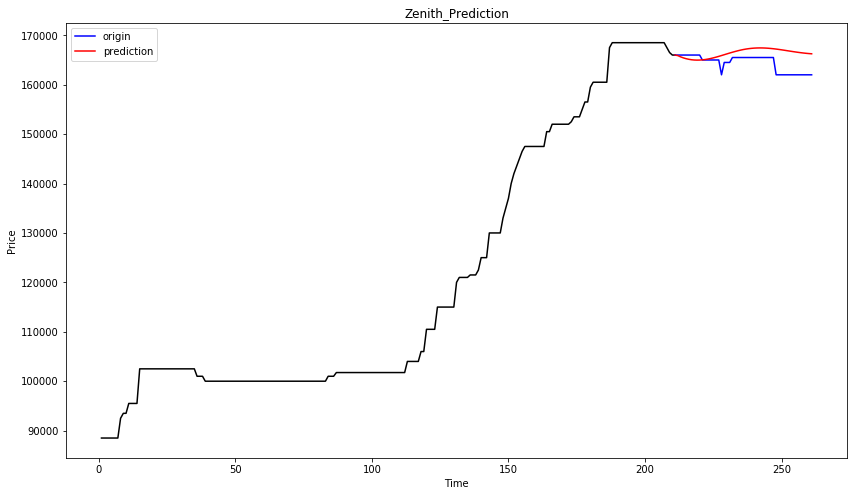

In [245]:
plt.figure(figsize=(14,8))
plt.plot(range(1,len(zenith_dataset[:-50])+1),(zenith_dataset*zenith_std+zenith_mean)[:-50], 'black', label='')
plt.plot(range(211,211+51), np.concatenate((np.asarray([zenith_dataset[:-50][-1]], dtype='float64')*zenith_std+zenith_mean,zenith_estim_target*zenith_std+zenith_mean)), 'b', label='origin')
plt.plot(range(211,211+51), np.concatenate((np.asarray([zenith_dataset[:-50][-1]], dtype='float64')*zenith_std+zenith_mean,zen_prediction*zenith_std+zenith_mean)), 'r', label='prediction')
plt.legend()
plt.title('Zenith_Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.savefig('Zenith.png')
plt.show()

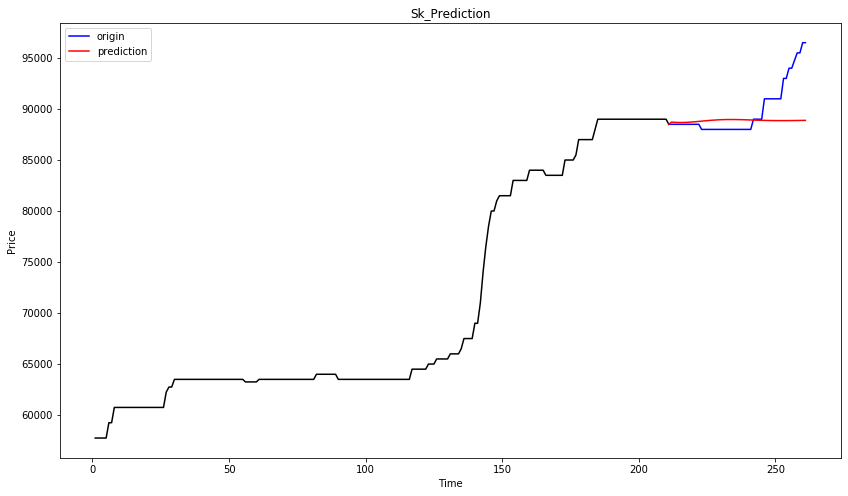

In [246]:
plt.figure(figsize=(14,8))
plt.plot(range(1,len(sk_dataset[:-50])+1),(sk_dataset*sk_std+sk_mean)[:-50], 'black', label='')
plt.plot(range(211,211+51), np.concatenate((np.asarray([sk_dataset[:-50][-1]], dtype='float64')*sk_std+sk_mean,sk_estim_target*sk_std+sk_mean)), 'b', label='origin')
plt.plot(range(211,211+51), np.concatenate((np.asarray([sk_dataset[:-50][-1]], dtype='float64')*sk_std+sk_mean,sk_prediction*sk_std+sk_mean)), 'r', label='prediction')
plt.legend()
plt.title('Sk_Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.savefig('Sk.png')
plt.show()

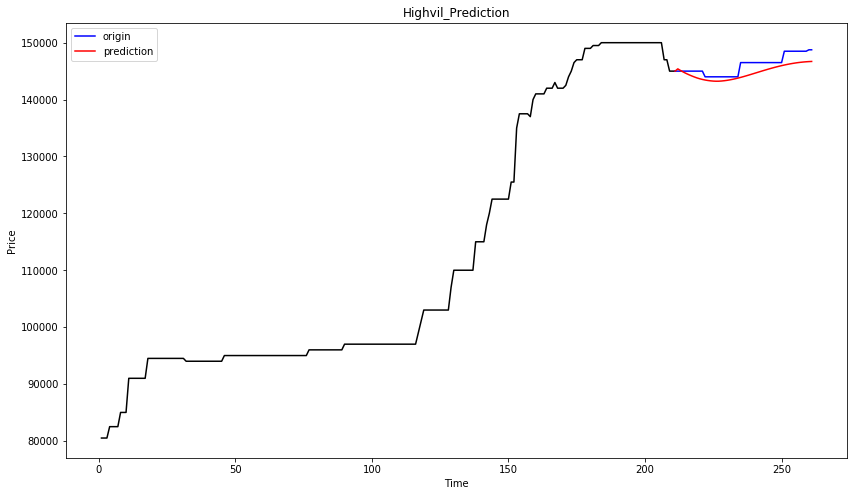

In [248]:
plt.figure(figsize=(14,8))
plt.plot(range(1,len(high_dataset[:-50])+1),(high_dataset*high_std+high_mean)[:-50], 'black', label='')
plt.plot(range(211,211+51), np.concatenate((np.asarray([high_dataset[:-50][-1]], dtype='float64')*high_std+high_mean,high_estim_target*high_std+high_mean)), 'b', label='origin')
plt.plot(range(211,211+51), np.concatenate((np.asarray([high_dataset[:-50][-1]], dtype='float64')*high_std+high_mean,high_prediction*high_std+high_mean)), 'r', label='prediction')
plt.legend()
plt.title('Highvil_Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.savefig('Highvil.png')
plt.show()